In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [ ]:
df = pd.read_csv('reviews_structured_v2.csv')

In [ ]:
df['visit_category'] = df['visit_category'].replace('Couple', 'Couples')

In [ ]:
df.dropna(thresh=df.shape[1]-1, inplace=True)
print("\n" + "="*80)
print("VALORES NULOS DESPUÉS DE ELIMINAR FILAS DONDE SOLO ESTÁ EL ID")
print("="*80)
print(df.isnull().sum())
print(f"\nPorcentaje de nulos por columna después de eliminar filas donde solo está el id:")
print((df.isnull().sum() / len(df) * 100).round(2))


VALORES NULOS DESPUÉS DE ELIMINAR FILAS DONDE SOLO ESTÁ EL ID
title                28
text                  0
rating                0
date_original         1
year                  0
month                 0
visit_category        0
language              1
tokens_count          0
keywords              0
id                    0
sentiment_overall     0
sentiment_score       0
dtype: int64

Porcentaje de nulos por columna después de eliminar filas donde solo está el id:
title                1.37
text                 0.00
rating               0.00
date_original        0.05
year                 0.00
month                0.00
visit_category       0.00
language             0.05
tokens_count         0.00
keywords             0.00
id                   0.00
sentiment_overall    0.00
sentiment_score      0.00
dtype: float64


In [ ]:
print("="*80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*80)
print(f"\nDimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\nPrimeras filas:")
print(df.head())

print("\n" + "="*80)
print("INFORMACIÓN DE COLUMNAS")
print("="*80)
print(df.info())

print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*80)
print(df.describe(include='all'))

print("\n" + "="*80)
print("VALORES NULOS")
print("="*80)
print(df.isnull().sum())
print(f"\nPorcentaje de nulos por columna:")
print((df.isnull().sum() / len(df) * 100).round(2))

INFORMACIÓN GENERAL DEL DATASET

Dimensiones: 2038 filas x 13 columnas

Primeras filas:
                                      title  \
0          Fantastic bike tour through Lima   
1                    Great way to see Lima!   
2                 Wonderful way to see Lima   
3  Beautiful bike tour along the Lima coast   
4                           Such a fun day!   

                                                text  rating  \
0  I was quite nervous booking this tour as I don...     5.0   
1  I had a great time exploring a few of Lima's n...     5.0   
2  Highly recommend the bike tour. It’s a great w...     5.0   
3  Highly recommended tourSuper choice of route: ...     5.0   
4  We had the best time on bicycle tour. The guid...     5.0   

        date_original    year   month visit_category language  tokens_count  \
0     Aug 2025 • Solo  2025.0  August           Solo       en          89.0   
1     Aug 2025 • Solo  2025.0  August           Solo       en          50.0   
2     J

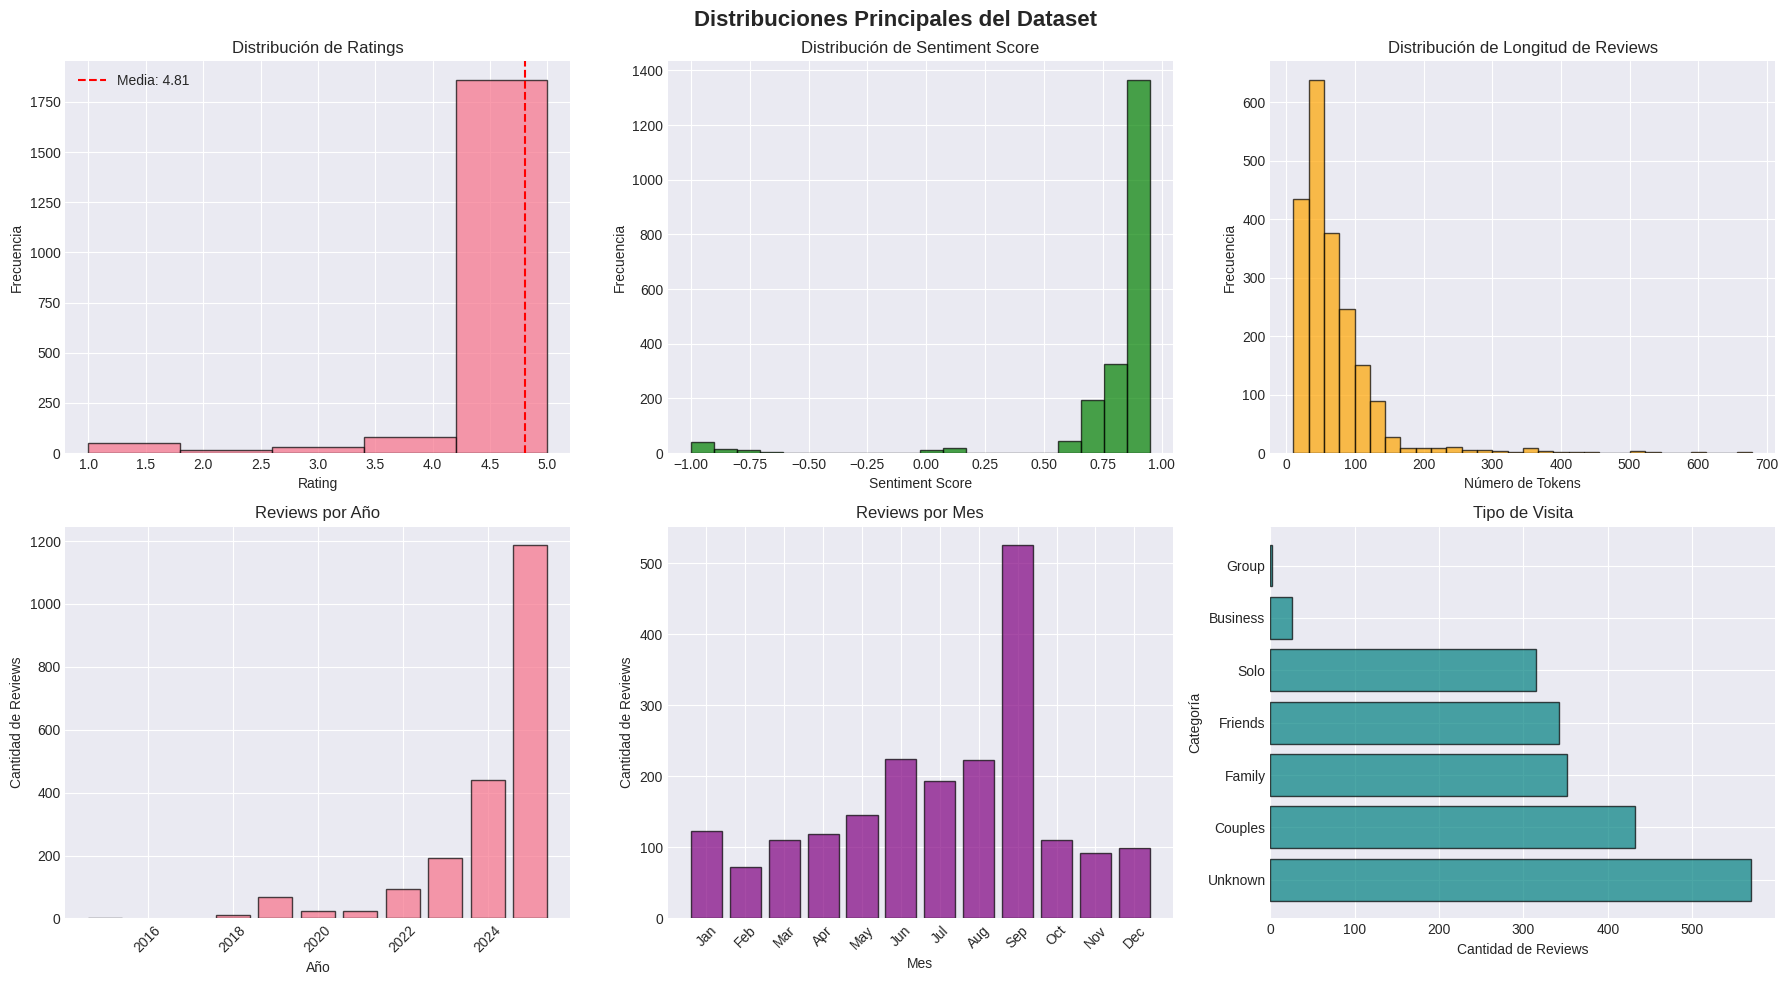

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribuciones Principales del Dataset', fontsize=16, fontweight='bold')

# 2.1 Distribución de Ratings
axes[0, 0].hist(df['rating'], bins=5, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribución de Ratings')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(df['rating'].mean(), color='red', linestyle='--', label=f'Media: {df["rating"].mean():.2f}')
axes[0, 0].legend()

# 2.2 Distribución de Sentiment Score
axes[0, 1].hist(df['sentiment_score'], bins=20, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('Distribución de Sentiment Score')
axes[0, 1].set_xlabel('Sentiment Score')
axes[0, 1].set_ylabel('Frecuencia')

# 2.3 Distribución de Longitud de Reviews (tokens)
axes[0, 2].hist(df['tokens_count'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[0, 2].set_title('Distribución de Longitud de Reviews')
axes[0, 2].set_xlabel('Número de Tokens')
axes[0, 2].set_ylabel('Frecuencia')

# 2.4 Reviews por Año
year_counts = df['year'].value_counts().sort_index()
axes[1, 0].bar(year_counts.index, year_counts.values, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Reviews por Año')
axes[1, 0].set_xlabel('Año')
axes[1, 0].set_ylabel('Cantidad de Reviews')
axes[1, 0].tick_params(axis='x', rotation=45)

# 2.5 Reviews por Mes
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = df['month'].value_counts().reindex(month_order, fill_value=0)
axes[1, 1].bar(range(len(month_counts)), month_counts.values, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].set_title('Reviews por Mes')
axes[1, 1].set_xlabel('Mes')
axes[1, 1].set_ylabel('Cantidad de Reviews')
axes[1, 1].set_xticks(range(len(month_counts)))
axes[1, 1].set_xticklabels([m[:3] for m in month_order], rotation=45)

# 2.6 Categoría de Visita
visit_counts = df['visit_category'].value_counts()
axes[1, 2].barh(visit_counts.index, visit_counts.values, edgecolor='black', alpha=0.7, color='teal')
axes[1, 2].set_title('Tipo de Visita')
axes[1, 2].set_xlabel('Cantidad de Reviews')
axes[1, 2].set_ylabel('Categoría')

plt.tight_layout()
plt.show()


ANÁLISIS DE SENTIMIENTO

Distribución de Sentimientos:
sentiment_overall
positive    1932
negative      72
neutral       34
Name: count, dtype: int64

Porcentajes:
sentiment_overall
positive    94.80
negative     3.53
neutral      1.67
Name: count, dtype: float64


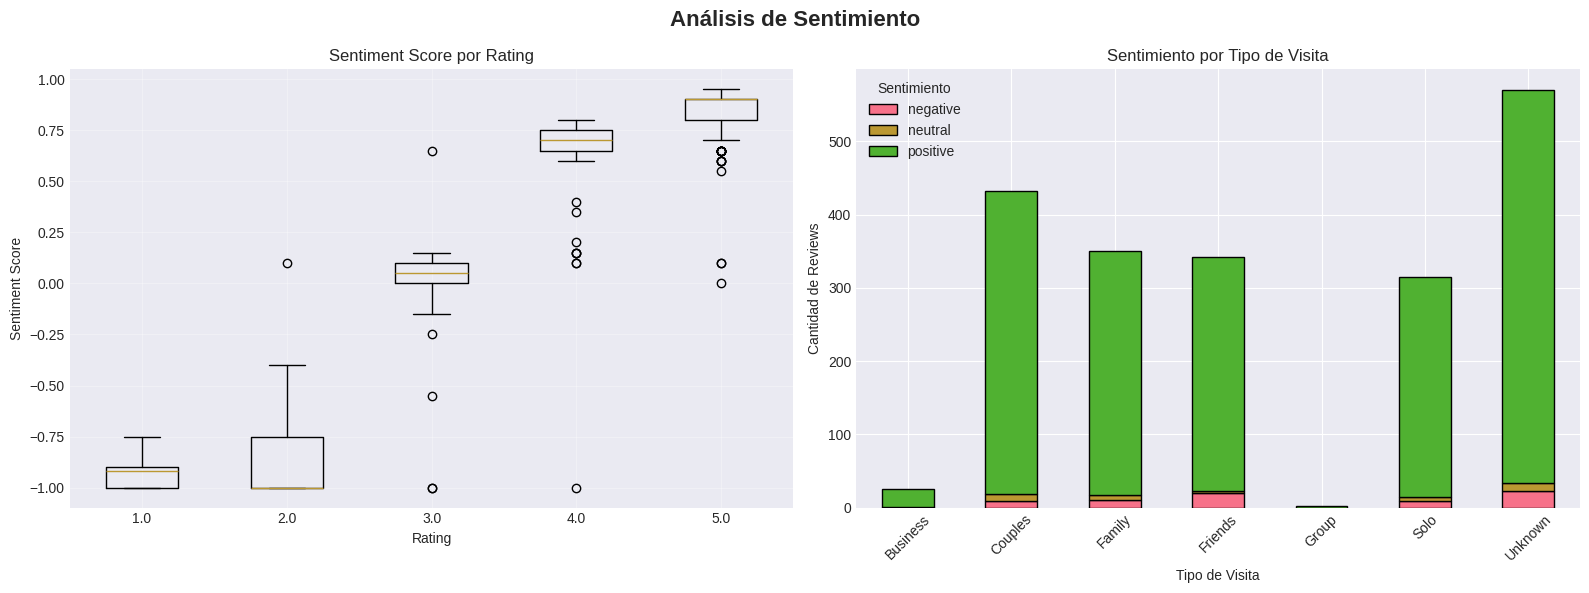


Correlación Rating vs Sentiment Score: 0.952


In [ ]:
print("\n" + "="*80)
print("ANÁLISIS DE SENTIMIENTO")
print("="*80)

# Distribución de sentimientos
sentiment_dist = df['sentiment_overall'].value_counts()
print(f"\nDistribución de Sentimientos:")
print(sentiment_dist)
print(f"\nPorcentajes:")
print((sentiment_dist / len(df) * 100).round(2))

# Relación entre Rating y Sentiment Score
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Análisis de Sentimiento', fontsize=16, fontweight='bold')

# Boxplot de sentiment score por rating
axes[0].boxplot([df[df['rating'] == r]['sentiment_score'].dropna() for r in sorted(df['rating'].unique())],
                labels=sorted(df['rating'].unique()))
axes[0].set_title('Sentiment Score por Rating')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Sentiment Score')
axes[0].grid(True, alpha=0.3)

# Distribución de sentiment por categoría
sentiment_by_category = df.groupby(['visit_category', 'sentiment_overall']).size().unstack(fill_value=0)
sentiment_by_category.plot(kind='bar', stacked=True, ax=axes[1], edgecolor='black')
axes[1].set_title('Sentimiento por Tipo de Visita')
axes[1].set_xlabel('Tipo de Visita')
axes[1].set_ylabel('Cantidad de Reviews')
axes[1].legend(title='Sentimiento')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Correlación entre rating y sentiment_score
correlation = df[['rating', 'sentiment_score']].corr().iloc[0, 1]
print(f"\nCorrelación Rating vs Sentiment Score: {correlation:.3f}")


ANÁLISIS TEMPORAL


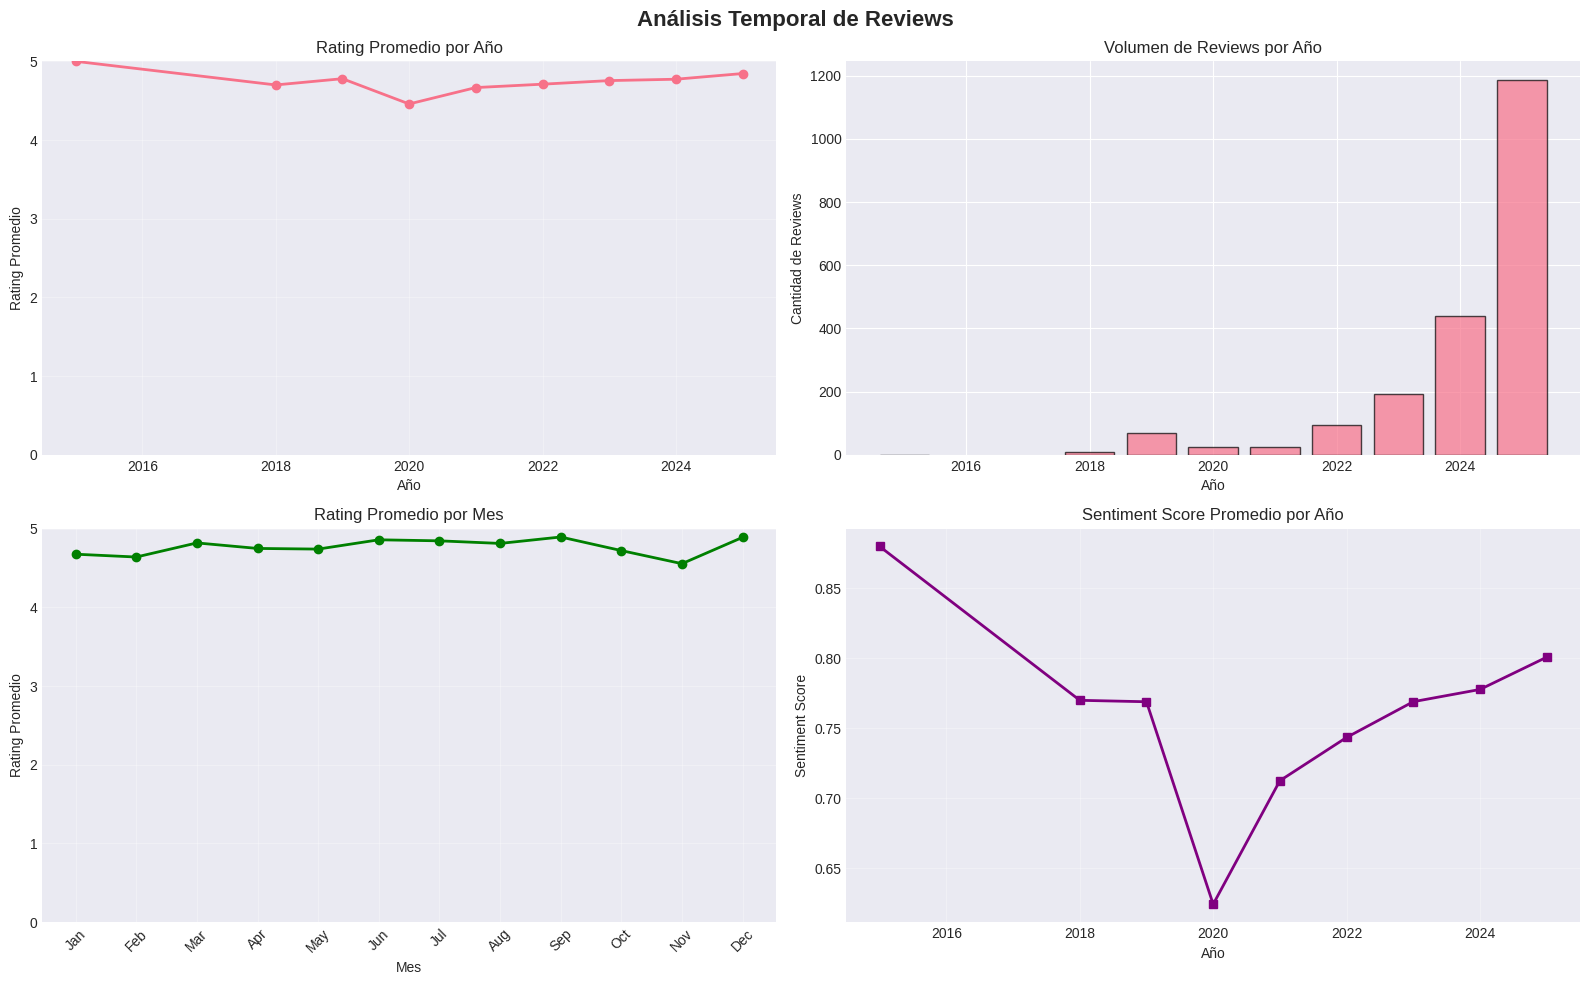

In [ ]:
print("\n" + "="*80)
print("ANÁLISIS TEMPORAL")
print("="*80)

# Tendencia de ratings a lo largo del tiempo
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Análisis Temporal de Reviews', fontsize=16, fontweight='bold')

# Rating promedio por año
rating_by_year = df.groupby('year')['rating'].agg(['mean', 'count'])
axes[0, 0].plot(rating_by_year.index, rating_by_year['mean'], marker='o', linewidth=2)
axes[0, 0].set_title('Rating Promedio por Año')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Rating Promedio')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_ylim([0, 5])

# Volumen de reviews por año
axes[0, 1].bar(rating_by_year.index, rating_by_year['count'], edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Volumen de Reviews por Año')
axes[0, 1].set_xlabel('Año')
axes[0, 1].set_ylabel('Cantidad de Reviews')

# Rating promedio por mes
rating_by_month = df.groupby('month')['rating'].mean().reindex(month_order)
axes[1, 0].plot(range(len(rating_by_month)), rating_by_month.values, marker='o', linewidth=2, color='green')
axes[1, 0].set_title('Rating Promedio por Mes')
axes[1, 0].set_xlabel('Mes')
axes[1, 0].set_ylabel('Rating Promedio')
axes[1, 0].set_xticks(range(len(month_order)))
axes[1, 0].set_xticklabels([m[:3] for m in month_order], rotation=45)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_ylim([0, 5])

# Sentiment score a lo largo del tiempo
sentiment_by_year = df.groupby('year')['sentiment_score'].mean()
axes[1, 1].plot(sentiment_by_year.index, sentiment_by_year.values, marker='s', linewidth=2, color='purple')
axes[1, 1].set_title('Sentiment Score Promedio por Año')
axes[1, 1].set_xlabel('Año')
axes[1, 1].set_ylabel('Sentiment Score')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


ANÁLISIS DE KEYWORDS Y TEMAS

Top 30 Keywords más frecuentes:
 1. tour                :  920 menciones
 2. guide               :  897 menciones
 3. lima                :  603 menciones
 4. experience          :  408 menciones
 5. recommend           :  333 menciones
 6. peru                :  260 menciones
 7. history             :  218 menciones
 8. food                :  215 menciones
 9. friendly            :  197 menciones
10. driver              :  184 menciones
11. fun                 :  179 menciones
12. amazing             :  174 menciones
13. excellent           :  173 menciones
14. knowledgeable       :  168 menciones
15. recommended         :  154 menciones
16. trip                :  150 menciones
17. service             :  145 menciones
18. peruvian            :  144 menciones
19. culture             :  120 menciones
20. huacachina          :  112 menciones
21. guides              :  108 menciones
22. barranco            :  103 menciones
23. pisco               :  101 menc

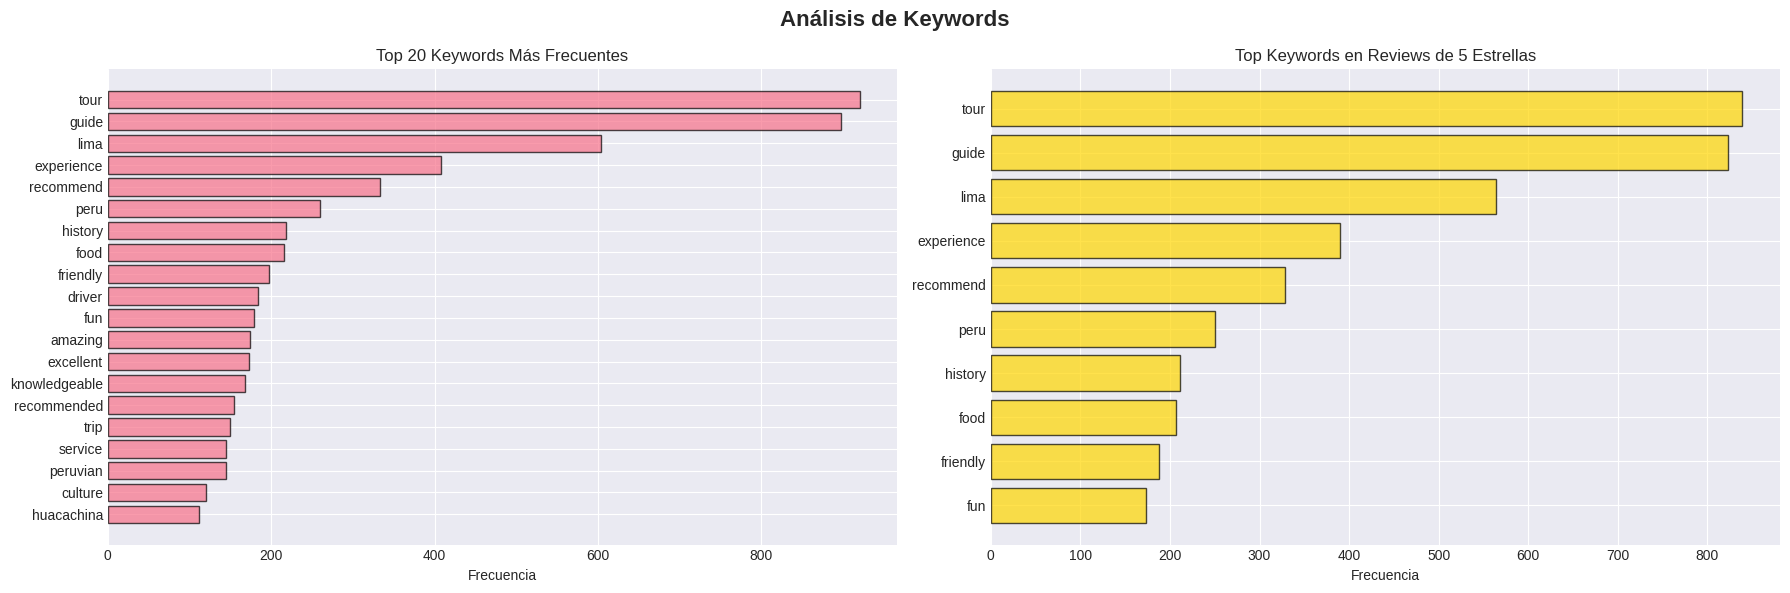

In [ ]:
print("\n" + "="*80)
print("ANÁLISIS DE KEYWORDS Y TEMAS")
print("="*80)

# Procesar keywords (asumiendo que están como string de lista)
import ast

def extract_keywords(keywords_str):
    try:
        return ast.literal_eval(keywords_str) if isinstance(keywords_str, str) else keywords_str
    except:
        return []

df['keywords_list'] = df['keywords'].apply(extract_keywords)

# Contar todas las keywords
all_keywords = []
for keywords in df['keywords_list']:
    if isinstance(keywords, list):
        all_keywords.extend(keywords)

keyword_counts = Counter(all_keywords)
top_keywords = keyword_counts.most_common(30)

print(f"\nTop 30 Keywords más frecuentes:")
for i, (keyword, count) in enumerate(top_keywords, 1):
    print(f"{i:2d}. {keyword:20s}: {count:4d} menciones")

# Visualización de top keywords
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Análisis de Keywords', fontsize=16, fontweight='bold')

keywords_df = pd.DataFrame(top_keywords[:20], columns=['keyword', 'count'])
axes[0].barh(keywords_df['keyword'], keywords_df['count'], edgecolor='black', alpha=0.7)
axes[0].set_title('Top 20 Keywords Más Frecuentes')
axes[0].set_xlabel('Frecuencia')
axes[0].invert_yaxis()

# Keywords por rating
keywords_by_rating = {}
for rating in sorted(df['rating'].unique()):
    rating_keywords = []
    for keywords in df[df['rating'] == rating]['keywords_list']:
        if isinstance(keywords, list):
            rating_keywords.extend(keywords)
    keywords_by_rating[rating] = Counter(rating_keywords).most_common(10)

# Mostrar keywords de reviews con rating 5
top_5_star_keywords = [k[0] for k in keywords_by_rating.get(5, [])][:15]
top_5_star_counts = [k[1] for k in keywords_by_rating.get(5, [])][:15]

axes[1].barh(top_5_star_keywords, top_5_star_counts, edgecolor='black', alpha=0.7, color='gold')
axes[1].set_title('Top Keywords en Reviews de 5 Estrellas')
axes[1].set_xlabel('Frecuencia')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


ANÁLISIS POR TIPO DE VISITANTE

Estadísticas por Tipo de Visita:
               rating       sentiment_score tokens_count
                 mean count            mean         mean
visit_category                                          
Business         4.77    26            0.77        57.15
Couples          4.85   432            0.82        71.41
Family           4.81   351            0.80        67.72
Friends          4.75   342            0.76        64.26
Group            5.00     2            0.90       101.00
Solo             4.83   315            0.80        71.57
Unknown          4.79   570            0.77        65.56


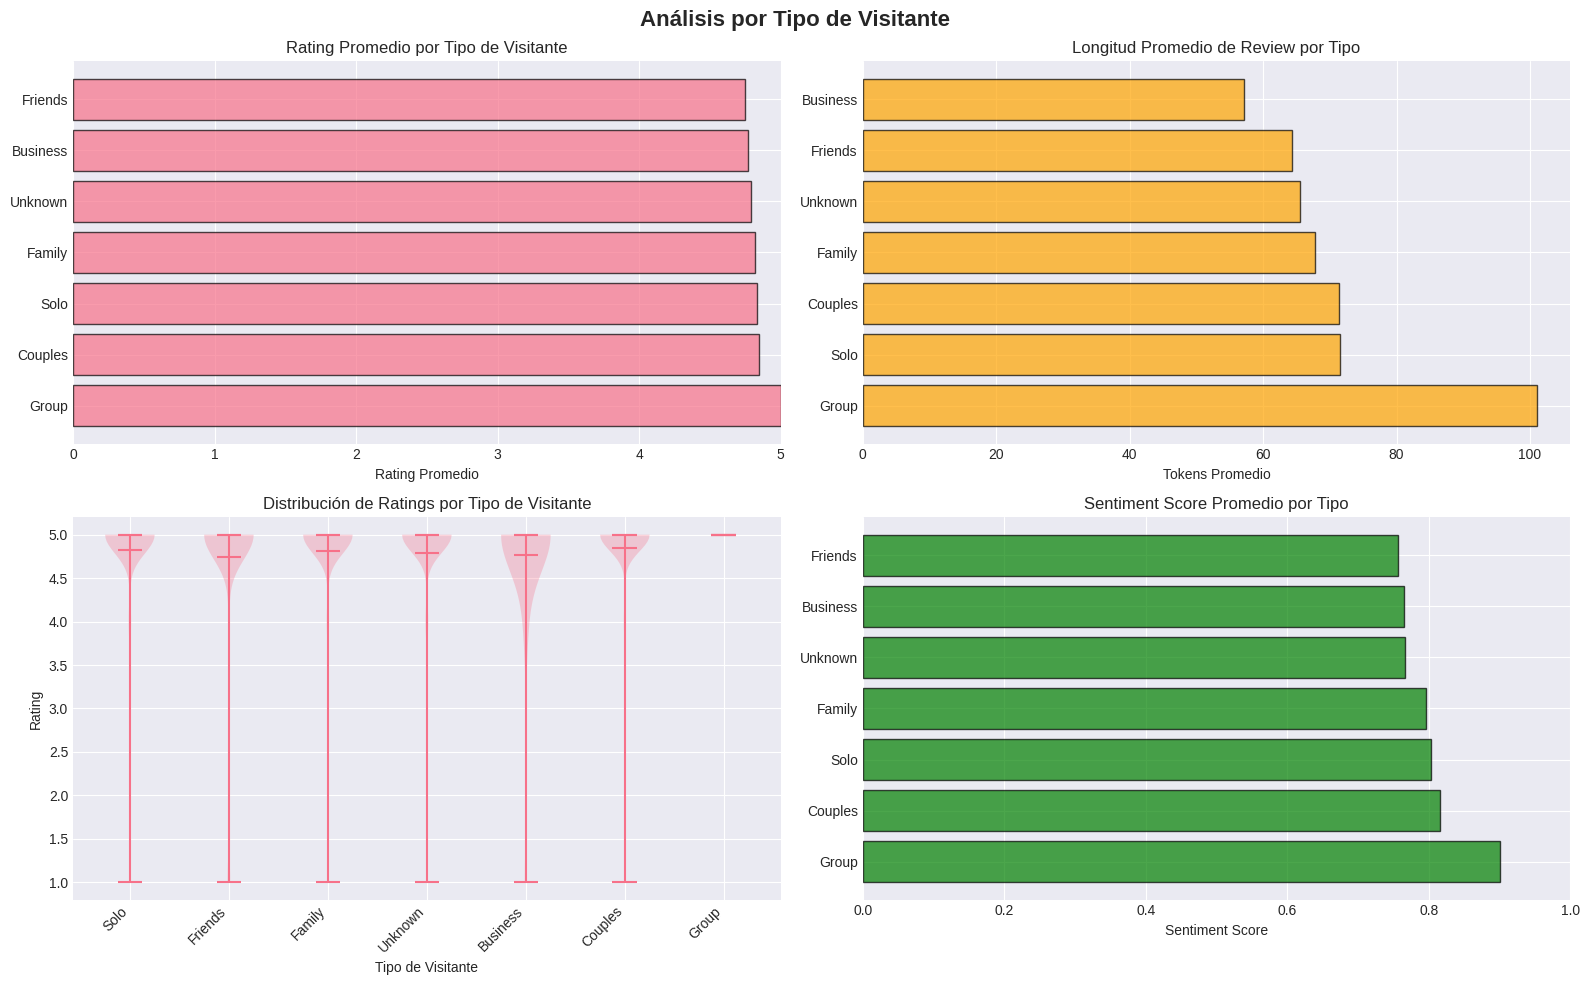

In [ ]:
print("\n" + "="*80)
print("ANÁLISIS POR TIPO DE VISITANTE")
print("="*80)

# Estadísticas por categoría de visita
visit_stats = df.groupby('visit_category').agg({
    'rating': ['mean', 'count'],
    'sentiment_score': 'mean',
    'tokens_count': 'mean'
}).round(2)

print("\nEstadísticas por Tipo de Visita:")
print(visit_stats)

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Análisis por Tipo de Visitante', fontsize=16, fontweight='bold')

# Rating promedio por tipo
visit_rating = df.groupby('visit_category')['rating'].mean().sort_values(ascending=False)
axes[0, 0].barh(visit_rating.index, visit_rating.values, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Rating Promedio por Tipo de Visitante')
axes[0, 0].set_xlabel('Rating Promedio')
axes[0, 0].set_xlim([0, 5])

# Longitud promedio de review por tipo
visit_length = df.groupby('visit_category')['tokens_count'].mean().sort_values(ascending=False)
axes[0, 1].barh(visit_length.index, visit_length.values, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Longitud Promedio de Review por Tipo')
axes[0, 1].set_xlabel('Tokens Promedio')

# Distribución de ratings por tipo (violin plot)
visit_categories = df['visit_category'].unique()
positions = range(len(visit_categories))
violin_data = [df[df['visit_category'] == cat]['rating'].values for cat in visit_categories]
parts = axes[1, 0].violinplot(violin_data, positions=positions, showmeans=True, showmedians=True)
axes[1, 0].set_title('Distribución de Ratings por Tipo de Visitante')
axes[1, 0].set_xlabel('Tipo de Visitante')
axes[1, 0].set_ylabel('Rating')
axes[1, 0].set_xticks(positions)
axes[1, 0].set_xticklabels(visit_categories, rotation=45, ha='right')

# Sentiment score por tipo
visit_sentiment = df.groupby('visit_category')['sentiment_score'].mean().sort_values(ascending=False)
axes[1, 1].barh(visit_sentiment.index, visit_sentiment.values, edgecolor='black', alpha=0.7, color='green')
axes[1, 1].set_title('Sentiment Score Promedio por Tipo')
axes[1, 1].set_xlabel('Sentiment Score')
axes[1, 1].set_xlim([0, 1])

plt.tight_layout()
plt.show()


ANÁLISIS DE IDIOMA

Distribución de Idiomas:
language
en    2031
es       5
fr       1
Name: count, dtype: int64

Porcentajes:
language
en    99.66
es     0.25
fr     0.05
Name: count, dtype: float64

Estadísticas por Idioma:
         rating       sentiment_score tokens_count
           mean count            mean         mean
language                                          
en         4.81  2031            0.79        67.85
es         5.00     5            0.79        52.80
fr         4.00     1            0.65       111.00


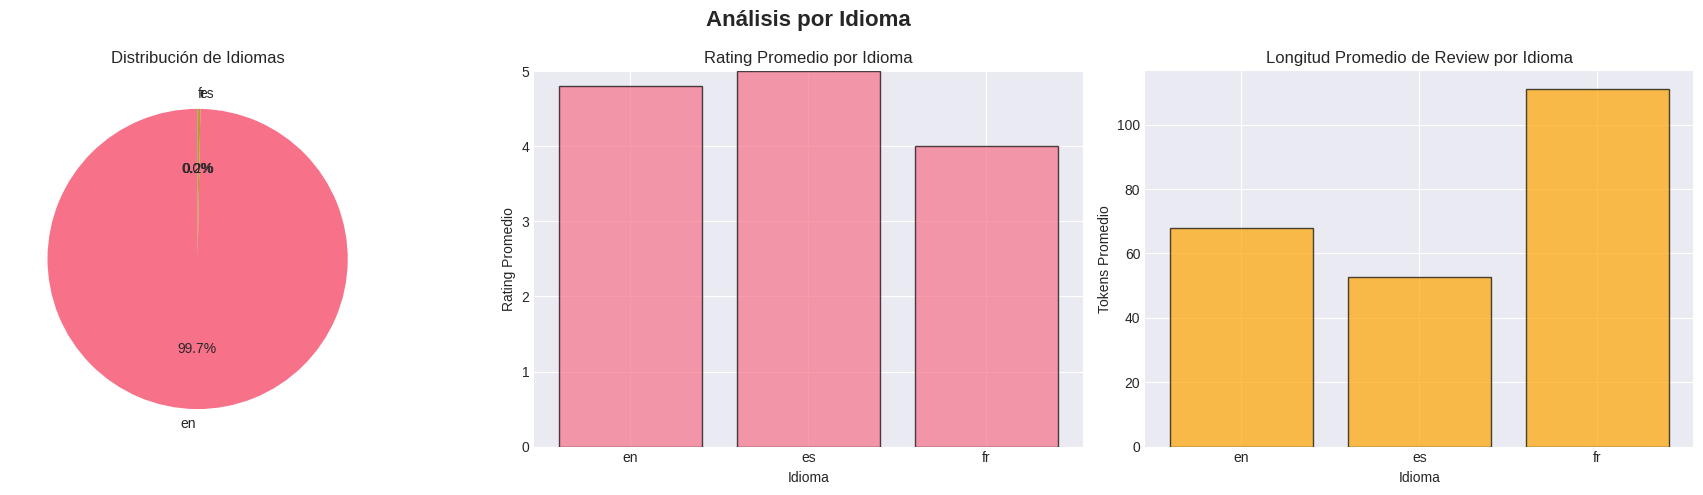

In [ ]:
print("\n" + "="*80)
print("ANÁLISIS DE IDIOMA")
print("="*80)

# Distribución de idiomas
lang_dist = df['language'].value_counts()
print(f"\nDistribución de Idiomas:")
print(lang_dist)
print(f"\nPorcentajes:")
print((lang_dist / len(df) * 100).round(2))

# Comparación de métricas por idioma
lang_stats = df.groupby('language').agg({
    'rating': ['mean', 'count'],
    'sentiment_score': 'mean',
    'tokens_count': 'mean'
}).round(2)

print("\nEstadísticas por Idioma:")
print(lang_stats)

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Análisis por Idioma', fontsize=16, fontweight='bold')

# Distribución de idiomas
axes[0].pie(lang_dist.values, labels=lang_dist.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribución de Idiomas')

# Rating por idioma
lang_rating = df.groupby('language')['rating'].mean()
axes[1].bar(lang_rating.index, lang_rating.values, edgecolor='black', alpha=0.7)
axes[1].set_title('Rating Promedio por Idioma')
axes[1].set_xlabel('Idioma')
axes[1].set_ylabel('Rating Promedio')
axes[1].set_ylim([0, 5])

# Longitud de review por idioma
lang_length = df.groupby('language')['tokens_count'].mean()
axes[2].bar(lang_length.index, lang_length.values, edgecolor='black', alpha=0.7, color='orange')
axes[2].set_title('Longitud Promedio de Review por Idioma')
axes[2].set_xlabel('Idioma')
axes[2].set_ylabel('Tokens Promedio')

plt.tight_layout()
plt.show()


CORRELACIONES ENTRE VARIABLES NUMÉRICAS

Matriz de Correlación:
                   rating  sentiment_score  tokens_count
rating           1.000000         0.951672     -0.177427
sentiment_score  0.951672         1.000000     -0.136942
tokens_count    -0.177427        -0.136942      1.000000


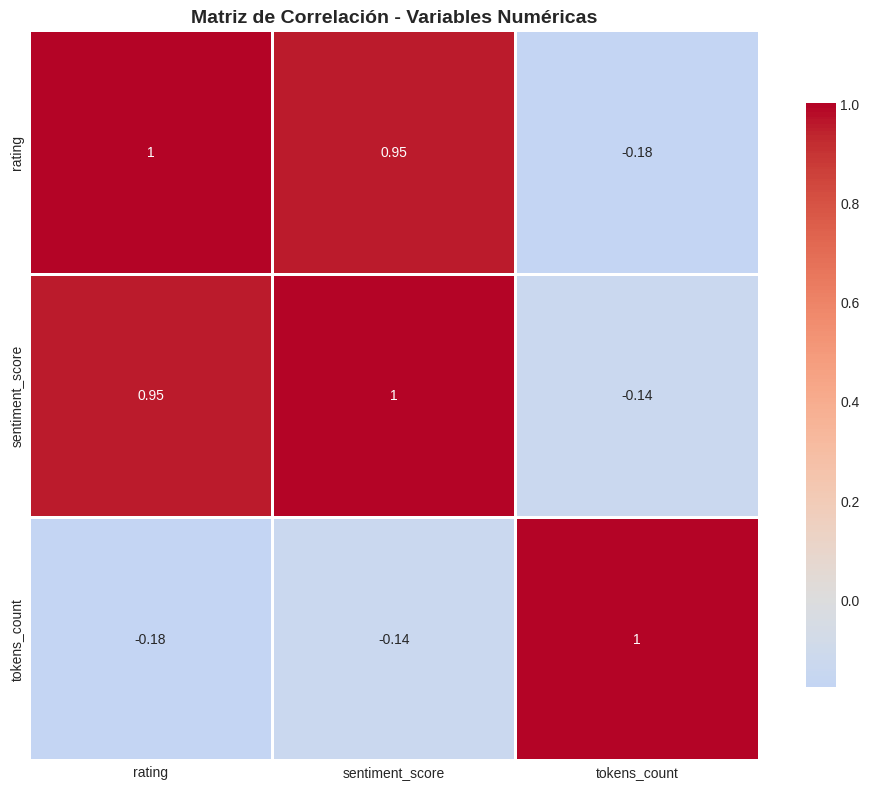

In [ ]:
print("\n" + "="*80)
print("CORRELACIONES ENTRE VARIABLES NUMÉRICAS")
print("="*80)

# Seleccionar variables numéricas
numeric_cols = ['rating', 'sentiment_score', 'tokens_count']
correlation_matrix = df[numeric_cols].corr()

print("\nMatriz de Correlación:")
print(correlation_matrix)

# Visualización
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
print("\n" + "="*80)
print("INSIGHTS CLAVE PARA SISTEMA DE RECOMENDACIÓN")
print("="*80)

# 1. Keywords más asociadas a reviews positivas (rating >= 4)
positive_reviews = df[df['rating'] >= 4]
positive_keywords = []
for keywords in positive_reviews['keywords_list']:
    if isinstance(keywords, list):
        positive_keywords.extend(keywords)

top_positive_keywords = Counter(positive_keywords).most_common(15)
print("\n1. Keywords más frecuentes en reviews POSITIVAS (Rating >= 4):")
for keyword, count in top_positive_keywords:
    print(f"   - {keyword}: {count} menciones")

# 2. Keywords más asociadas a reviews negativas (rating <= 3)
negative_reviews = df[df['rating'] <= 3]
negative_keywords = []
for keywords in negative_reviews['keywords_list']:
    if isinstance(keywords, list):
        negative_keywords.extend(keywords)

if negative_keywords:
    top_negative_keywords = Counter(negative_keywords).most_common(10)
    print("\n2. Keywords más frecuentes en reviews NEGATIVAS (Rating <= 3):")
    for keyword, count in top_negative_keywords:
        print(f"   - {keyword}: {count} menciones")
else:
    print("\n2. No hay suficientes reviews negativas para análisis de keywords")

# 3. Perfil de visitantes más satisfechos
print("\n3. Tipos de visitantes más satisfechos:")
satisfaction_by_visit = df.groupby('visit_category').agg({
    'rating': 'mean',
    'sentiment_score': 'mean'
}).sort_values('rating', ascending=False)
print(satisfaction_by_visit)

# 4. Temporadas con mejores reviews
print("\n4. Mejores épocas para visitar (basado en ratings):")
season_rating = df.groupby('month')['rating'].mean().sort_values(ascending=False)
print(season_rating.head(5))

# 5. Longitud óptima de review vs calidad
print("\n5. Análisis de longitud de review:")
print(f"   - Reviews cortas (<50 tokens): Rating promedio = {df[df['tokens_count'] < 50]['rating'].mean():.2f}")
print(f"   - Reviews medianas (50-100 tokens): Rating promedio = {df[(df['tokens_count'] >= 50) & (df['tokens_count'] <= 100)]['rating'].mean():.2f}")
print(f"   - Reviews largas (>100 tokens): Rating promedio = {df[df['tokens_count'] > 100]['rating'].mean():.2f}")


INSIGHTS CLAVE PARA SISTEMA DE RECOMENDACIÓN

1. Keywords más frecuentes en reviews POSITIVAS (Rating >= 4):
   - tour: 876 menciones
   - guide: 861 menciones
   - lima: 588 menciones
   - experience: 399 menciones
   - recommend: 331 menciones
   - peru: 254 menciones
   - history: 218 menciones
   - food: 211 menciones
   - friendly: 195 menciones
   - fun: 179 menciones
   - driver: 176 menciones
   - amazing: 174 menciones
   - excellent: 173 menciones
   - knowledgeable: 168 menciones
   - recommended: 154 menciones

2. Keywords más frecuentes en reviews NEGATIVAS (Rating <= 3):
   - tour: 44 menciones
   - guide: 36 menciones
   - lima: 15 menciones
   - bus: 13 menciones
   - trip: 12 menciones
   - refund: 10 menciones
   - english: 10 menciones
   - experience: 9 menciones
   - service: 8 menciones
   - driver: 8 menciones

3. Tipos de visitantes más satisfechos:
                  rating  sentiment_score
visit_category                           
Group           5.000000     